In [2]:
'''
Alejandra Macias
Loan data from Lending Club from 2006-2010 to predict whether or not the loan would be paid off
'''

# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#Create dataframe
#import csv file with the loan data
df = pd.read_csv('loan_data.csv')

In [4]:
#check the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
#check the head
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5,0,'FICO')

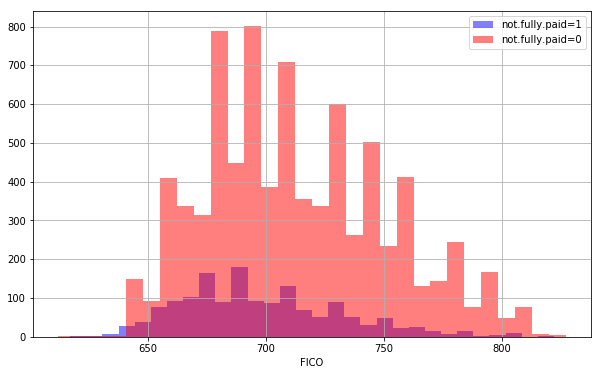

In [6]:
#histogram of not fully paid histograms
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')


Text(0.5,0,'Delinquency')

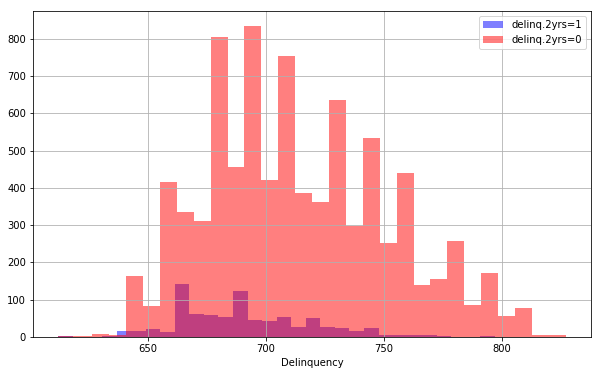

In [7]:
#histogram of delinquent and fico distribution
plt.figure(figsize=(10,6))
df[df['delinq.2yrs']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='delinq.2yrs=1')
df[df['delinq.2yrs']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='delinq.2yrs=0')
plt.legend()
plt.xlabel('Delinquency')

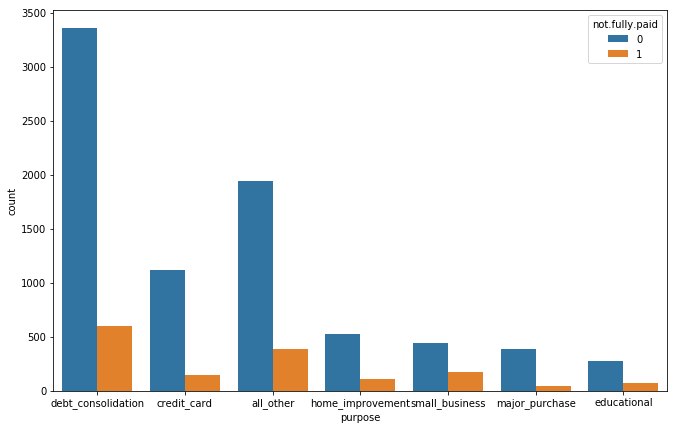

In [10]:
#count plot of the loans that were taken out and the purpose of those loans
plt.figure(figsize= (11,7))
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette= ["C0", "C1", "k"])

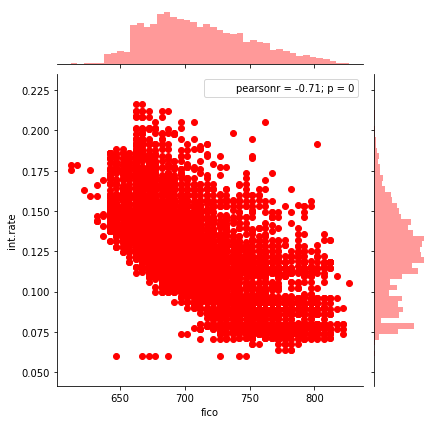

In [11]:
#relation between FICO score and interes rate 
sns.jointplot(x='fico', y='int.rate', data = df, color='red')

In [12]:
#Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [13]:
#list containing the string purpose for the categorical feature
catag = ['purpose']

In [14]:
#create a fixed larger dataframe
final = pd.get_dummies(df,columns = catag,drop_first=True)

In [15]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [16]:
#train test split
from sklearn.model_selection import train_test_split

In [18]:
X = final.drop('not.fully.paid',axis=1)
y = final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
#Create instance
tree = DecisionTreeClassifier()

In [23]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
#prediction

In [24]:
pred = tree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.85      0.82      0.84      2431
          1       0.19      0.23      0.21       443

avg / total       0.75      0.73      0.74      2874



In [28]:
print(confusion_matrix(y_test,pred))

[[1991  440]
 [ 339  104]]
